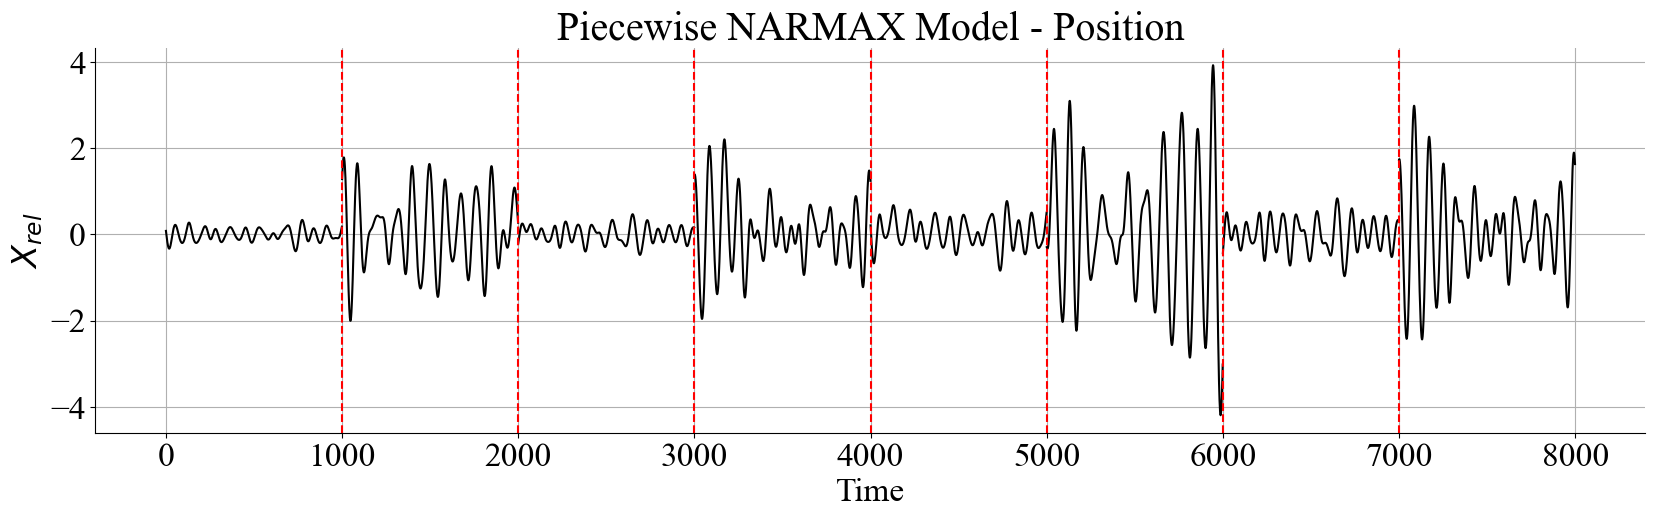

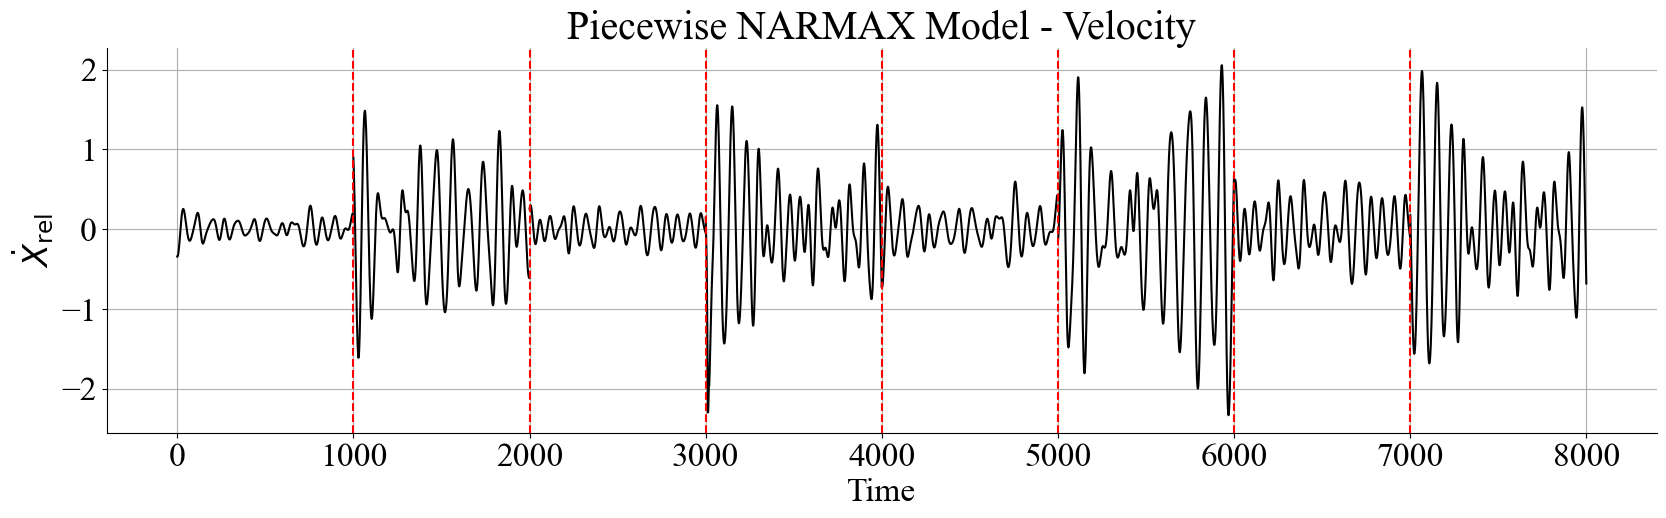

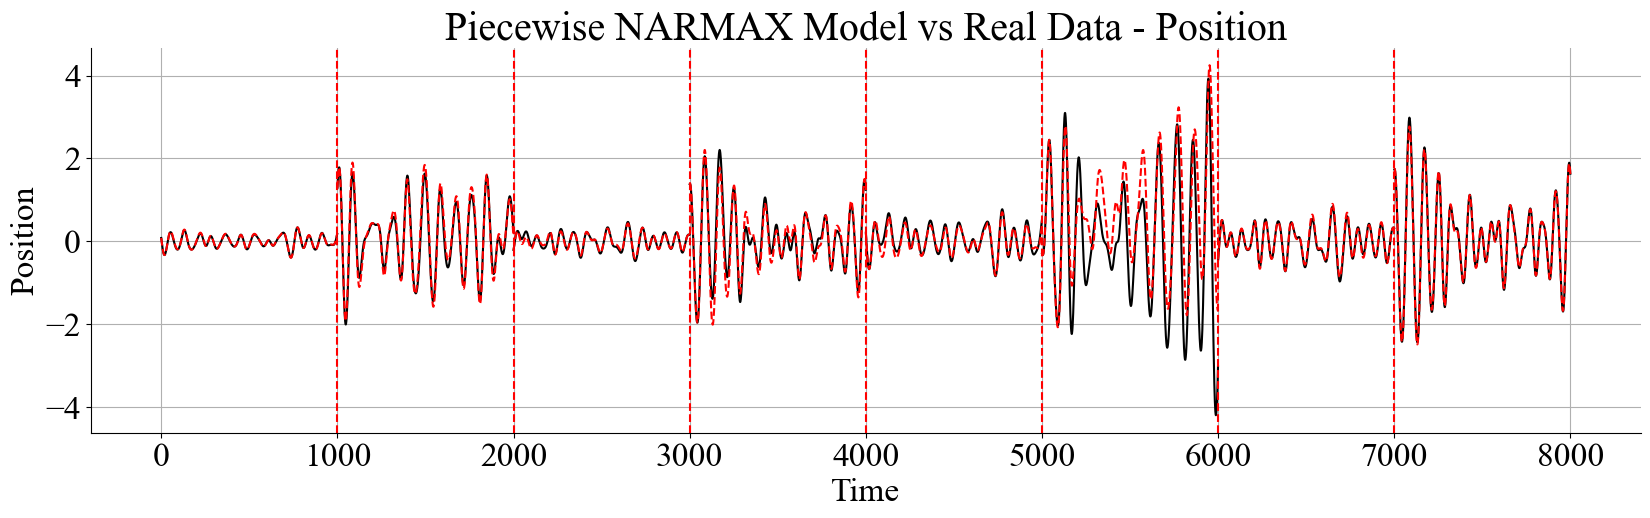

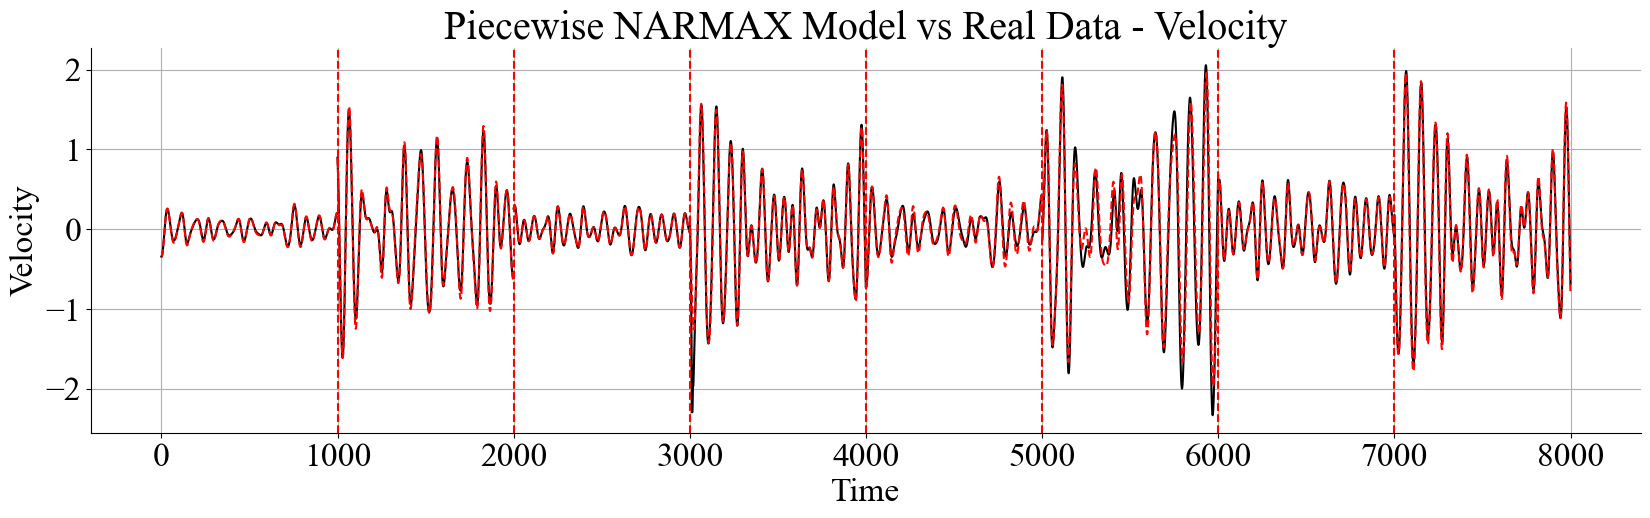

In [1]:
"""
Piecewise Data-Driven Modelling of the RM3 Wave Energy Converter for Multi-Condition Prediction
Thalita Nazare
Institution: Maynooth University
Submitted to: 2025 European Wave and Tidal Energy Conference
Last Updated: 18/03/2025
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set font properties globally
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 24
})

# Define function to apply the NARMAX model
def apply_narmax(y_real, x, equation, max_lag):
    """
    Compute y[t] using the given NARMAX equation with initial conditions.
    """
    y_pred = np.zeros_like(y_real)
    y_pred[:max_lag] = y_real[:max_lag]  # Set initial conditions from real data
    
    for t in range(max_lag, len(y_real)):
        local_vars = {"t": t, "y_p": y_pred, "y_v": y_pred, "x1": x}
        y_pred[t] = eval(equation, {}, local_vars) # Evaluate the equation dynamically
    return y_pred

# List of sea states with corresponding NARMAX equations
sea_states = [
    {"Hs": 1.2, "Tp": 10, "file": "data1_1p2Hs_10Tp.csv", "max_lag_p": 15, "max_lag_v": 15,
     "p_eq": "(2.1629E+00 * y_p[t-1] - 6.2796E-01 * y_p[t-2] - 6.9201E-01 * y_p[t-3] - 2.1411E-01 * y_p[t-8] - 3.4218E-01 * y_p[t-4] + 1.0749E-01 * y_p[t-7] + 1.3620E-01 * y_p[t-5] + 7.9959E-09 * x1[t-1] - 8.8702E-09 * x1[t-2] + 9.2127E-10 * x1[t-11] + 4.6966E-01 * y_p[t-6])", 
     "v_eq": "(1.9363E+00 * y_v[t-1] - 1.7379E-01 * y_v[t-2] - 6.3815E-01 * y_v[t-3] + 2.6514E-01 * y_v[t-7] - 3.4732E-02 * y_v[t-15] - 1.3355E-01 * y_v[t-5] + 1.2761E-01 * y_v[t-14] + 2.1416E-02 * y_v[t-10] + 2.8224E-01 * y_v[t-6] - 7.9480E-09 * x1[t-15] + 6.4312E-08 * x1[t-1] - 5.5142E-01 * y_v[t-4] - 2.1607E-01 * y_v[t-11] + 4.0133E-02 * y_v[t-13] - 8.2462E-08 * x1[t-2] - 2.2434E-08 * x1[t-3] + 1.9216E-08 * x1[t-14] + 2.7451E-08 * x1[t-5] - 2.6022E-08 * x1[t-10] + 3.6782E-08 * x1[t-7] - 5.5538E-12 * x1[t-9] * y_v[t-1] + 2.1659E-01 * y_v[t-8] - 1.4173E-01 * y_v[t-12] - 4.5308E-08 * x1[t-9] + 3.6440E-08 * x1[t-8])"},

    {"Hs": 2.5, "Tp": 10, "file": "data2_2p5Hs_10Tp.csv", "max_lag_p": 43, "max_lag_v": 42,
     "p_eq": "(1.7095E+00 * y_p[t-1] + 1.8173E-01 * y_p[t-2] - 3.7939E-01 * y_p[t-3] + 1.6901E-01 * y_p[t-9] - 8.8158E-01 * y_p[t-4] - 1.2230E-01 * y_p[t-16]  - 2.4902E-01 * y_p[t-5] - 2.5345E-02 * y_p[t-28] + 1.4078E-01 * y_p[t-6] + 2.9084E-01 * y_p[t-35] - 1.9475E-01 * y_p[t-12] + 6.3218E-02 * y_p[t-36] + 3.6993E-01 * y_p[t-7] + 6.7733E-11 * x1[t-40] - 2.8870E-01 * y_p[t-13] + 3.1397E-01 * y_p[t-42] + 1.6134E-01 * y_p[t-20] + 4.1819E-01 * y_p[t-11] - 2.2816E-01 * y_p[t-37] - 1.2432E-01 * y_p[t-43] - 1.8244E-01 * y_p[t-41] + 2.6375E-08 * x1[t-1] - 5.4460E-08 * x1[t-2] + 2.8295E-08 * x1[t-3] - 1.8422E-10 * x1[t-16] - 1.4252E-01 * y_p[t-32] + 1.0879E-09 * x1[t-51] + 3.1525E-12 * x1[t-35] * y_p[t-7] - 1.1391E-09 * x1[t-50])", 
     "v_eq": "(1.8913E+00 * y_v[t-1] + 2.1083E-03 * y_v[t-2] - 2.5937E-01 * y_v[t-3] + 8.5802E-01 * y_v[t-7] + 5.6901E-02 * y_v[t-19] - 3.7065E-01 * y_v[t-5] + 2.1969E-01 * y_v[t-18] + 4.7032E-01 * y_v[t-8] - 1.3507E+00 * y_v[t-4] - 9.7593E-02 * y_v[t-24] + 2.6337E-01 * y_v[t-6] + 2.5684E-01 * y_v[t-9] - 3.1455E-02 * y_v[t-42] + 1.3396E-09 * x1[t-33] - 4.2631E-02 * y_v[t-21] - 2.3883E-01 * y_v[t-10] - 1.0338E-01 * y_v[t-33] - 2.6937E-01 * y_v[t-11] + 1.5352E-01 * y_v[t-17] + 4.4900E-02 * y_v[t-41] + 1.4370E-01 * y_v[t-30] + 4.6352E-08 * x1[t-1] - 5.2808E-01 * y_v[t-12] - 1.9346E-01 * y_v[t-23] + 8.3665E-02 * y_v[t-26] + 4.0955E-02 * y_v[t-15] + 1.4327E-12 * x1[t-33] * y_v[t-25] - 1.4138E-12 * x1[t-11] * y_v[t-4] - 6.6484E-08 * x1[t-2] - 2.1495E-08 * x1[t-3] - 2.7346E-08 * x1[t-8] + 2.1801E-09 * x1[t-4] + 3.3932E-09 * x1[t-14] + 6.3599E-08 * x1[t-5] - 1.5256E-09 * x1[t-32])"},

    {"Hs": 5.0, "Tp": 10, "file": "data3_5Hs_10Tp.csv", "max_lag_p": 15, "max_lag_v": 41,
     "p_eq": "(2.2112E+00 * y_p[t-1] - 5.1785E-01 * y_p[t-2] - 1.1253E+00 * y_p[t-3] - 4.2183E-01 * y_p[t-7] - 2.7902E-01 * y_p[t-4] + 3.5530E-09 * x1[t-1] - 3.3258E-09 * x1[t-2] - 2.1368E-08 * x1[t-13] + 6.0672E-01 * y_p[t-6] + 5.2602E-01 * y_p[t-5] + 4.7875E-08 * x1[t-12] - 2.6699E-08 * x1[t-11] + 5.3962E-06 * 1 - 6.1916E-13 * x1[t-1] * y_p[t-7])", 
     "v_eq": "(1.9256E+00 * y_v[t-1] - 1.6192E-01 * y_v[t-2] - 4.9835E-01 * y_v[t-3] + 3.5954E-01 * y_v[t-8] - 5.0760E-01 * y_v[t-4] - 1.2161E-01 * y_v[t-14] + 2.3053E-01 * y_v[t-6] - 2.5607E-02 * y_v[t-21] - 2.3585E-01 * y_v[t-10] - 1.6615E-01 * y_v[t-24] + 4.5938E-01 * y_v[t-7] - 1.1230E-09 * x1[t-30] + 4.5442E-03 * y_v[t-17] - 4.2554E-02 * y_v[t-34] - 5.7482E-01 * y_v[t-5] - 2.2154E-01 * y_v[t-12] + 5.5148E-08 * x1[t-1] - 4.5468E-08 * x1[t-2] - 1.2628E-07 * x1[t-3] + 1.4243E-09 * x1[t-8] + 1.1334E-01 * y_v[t-28] + 1.2735E-07 * x1[t-4] - 5.6448E-08 * x1[t-12] + 2.9025E-03 * y_v[t-41]+ 7.0627E-10 * x1[t-34] + 2.6357E-01 * y_v[t-20] + 4.4733E-08 * x1[t-13] + 2.2940E-01 * y_v[t-9] + 2.7184E-01 * y_v[t-30] - 3.0469E-01 * y_v[t-29])"},

    {"Hs": 6.2, "Tp": 10, "file": "data4_6p2Hs_10Tp.csv", "max_lag_p": 50, "max_lag_v": 34,
     "p_eq": "(1.8043E+00 * y_p[t-1] + 1.3893E-01 * y_p[t-2] - 6.1171E-01 * y_p[t-3] + 4.2356E-01 * y_p[t-8] - 6.0376E-01 * y_p[t-4] + 4.3769E-02 * y_p[t-19] + 5.0706E-02 * y_p[t-6] + 8.6884E-02 * y_p[t-22] - 7.6661E-02 * y_p[t-10] - 7.0264E-02 * y_p[t-32] + 3.3714E-01 * y_p[t-7] - 2.9226E-01 * y_p[t-13] - 5.7784E-02 * y_p[t-33] - 1.9849E-08 * x1[t-13] - 4.2813E-01 * y_p[t-5] - 7.4248E-02 * y_p[t-23] + 2.6875E-01 * y_p[t-21] + 1.2111E-03 * y_p[t-47] - 6.1768E-02 * y_p[t-24] - 4.5024E-02 * y_p[t-37] - 1.1549E-08 * x1[t-1] + 7.5400E-08 * x1[t-2] - 2.7024E-08 * x1[t-4] + 1.5588E-01 * y_p[t-34] + 2.3012E-01 * y_p[t-9] - 5.3847E-08 * x1[t-11] - 1.7131E-01 * y_p[t-17] - 9.3779E-08 * x1[t-3] - 1.6790E-01 * y_p[t-27] + 1.1955E-01 * y_p[t-29] + 6.6834E-08 * x1[t-5] + 6.3827E-08 * x1[t-12])", 
     "v_eq": "(2.0644E+00 * y_v[t-1] - 2.3409E-01 * y_v[t-2] - 8.8795E-01 * y_v[t-3] - 1.2125E-01 * y_v[t-7] - 5.6901E-01 * y_v[t-4] - 2.6492E-01 * y_v[t-13] + 2.8736E-01 * y_v[t-5] + 6.7766E-02 * y_v[t-26] - 2.8602E-02 * y_v[t-10] - 2.2983E-01 * y_v[t-25] - 4.5744E-11 * x1[t-33] - 3.6358E-02 * y_v[t-15] - 7.9207E-02 * y_v[t-33] + 2.3433E-01 * y_v[t-8] + 8.4829E-02 * y_v[t-18] + 3.7201E-08 * x1[t-1] + 4.9465E-01 * y_v[t-9] - 7.8513E-02 * y_v[t-23] - 6.4811E-13 * x1[t-18] * y_v[t-21] - 1.2519E-01 * y_v[t-11] + 1.3587E-01 * y_v[t-17] + 1.4053E-01 * y_v[t-6] + 4.5261E-02 * y_v[t-34] + 1.4018E-01 * y_v[t-28] - 2.2230E-01 * y_v[t-14] + 1.8183E-01 * y_v[t-19] - 4.7036E-08 * x1[t-2] - 2.9496E-08 * x1[t-3] - 3.0621E-08 * x1[t-7] + 9.7706E-10 * x1[t-16] + 6.9027E-08 * x1[t-5])"},

    {"Hs": 1.2, "Tp": 8,  "file": "data5_1p2Hs_8Tp.csv", "max_lag_p": 12, "max_lag_v": 15,
     "p_eq": "(1.7937E+00 * y_p[t-1] + 5.2678E-02 * y_p[t-2] - 7.6332E-01 * y_p[t-3] + 3.1464E-01 * y_p[t-7] + 1.2708E-08 * x1[t-1] - 5.2047E-01 * y_p[t-4] - 1.4134E-08 * x1[t-2] + 9.6304E-09 * x1[t-12] - 1.5445E-01 * y_p[t-9] - 2.4789E-11 * x1[t-3] * y_p[t-9] + 2.7708E-01 * y_p[t-6] + 1.4140E-08 * x1[t-15] - 2.2219E-08 * x1[t-14])", 
     "v_eq": "(1.7516E+00 * y_v[t-1] + 5.0182E-02 * y_v[t-2] - 5.8972E-01 * y_v[t-3] + 8.1716E-02 * y_v[t-6] - 9.6769E-03 * y_v[t-15] - 1.2629E-01 * y_v[t-5] + 1.8762E-08 * x1[t-15] + 2.2533E-01 * y_v[t-7] + 1.1204E-01 * y_v[t-14] + 1.5391E-02 * y_v[t-9] + 1.5694E-07 * x1[t-1] - 3.4533E-07 * x1[t-2] + 1.9305E-07 * x1[t-3] - 2.3323E-08 * x1[t-14] - 5.1470E-01 * y_v[t-4] - 2.5912E-01 * y_v[t-12] - 2.4959E-11 * x1[t-11] * y_v[t-1] + 2.6289E-01 * y_v[t-8])"},

    {"Hs": 2.5, "Tp": 8,  "file": "data6_2p5Hs_8Tp.csv", "max_lag_p": 35, "max_lag_v": 15,
     "p_eq": "(1.8638E+00 * y_p[t-1] + 1.5994E-03 * y_p[t-2] - 6.5592E-01 * y_p[t-3] + 3.1974E-02 * y_p[t-6] + 4.9175E-02 * y_p[t-17] - 6.7563E-01 * y_p[t-4] - 4.1840E-02 * y_p[t-31] + 3.5522E-01 * y_p[t-8] + 1.0375E-01 * y_p[t-19] + 2.3140E-08 * x1[t-1] + 1.0740E-01 * y_p[t-10] + 2.7430E-03 * y_p[t-34] + 2.4766E-01 * y_p[t-7] - 8.0345E-02 * y_p[t-11] + 1.2063E-02 * y_p[t-16] + 8.6161E-02 * y_p[t-29] - 9.5527E-02 * y_p[t-25] - 4.6206E-08 * x1[t-2] + 2.3104E-08 * x1[t-3] - 1.8947E-11 * x1[t-1] * y_p[t-8] - 3.2550E-05 * y_p[t-32] * y_p[t-13] - 3.1233E-01 * y_p[t-13] - 1.8602E-11 * x1[t-1] * y_p[t-35] + 1.1818E-11 * x1[t-7] * y_p[t-30])", 
     "v_eq": "(2.2127E+00 * y_v[t-1] - 5.0991E-01 * y_v[t-2] - 9.5073E-01 * y_v[t-3] + 2.5506E-01 * y_v[t-5] - 1.4237E-01 * y_v[t-15] + 5.6576E-01 * y_v[t-6] + 2.6493E-01 * y_v[t-14] + 2.6621E-01 * y_v[t-8] - 3.0817E-08 * x1[t-15] + 6.3570E-08 * x1[t-1] - 9.3662E-08 * x1[t-2] - 4.4107E-08 * x1[t-3] - 4.1643E-08 * x1[t-12] + 8.3586E-08 * x1[t-4] - 4.7651E-01 * y_v[t-10] + 6.3116E-08 * x1[t-14] - 4.8540E-01 * y_v[t-4])"},

    {"Hs": 5.0, "Tp": 8,  "file": "data7_5Hs_8Tp.csv", "max_lag_p": 40, "max_lag_v": 5,
     "p_eq": "(1.6359E+00 * y_p[t-1] + 2.6231E-01 * y_p[t-2] - 5.4268E-01 * y_p[t-3] - 9.2308E-03 * y_p[t-8] + 1.0944E-08 * x1[t-1] - 4.5868E-01 * y_p[t-4] - 2.8422E-01 * y_p[t-13] - 1.5426E-08 * x1[t-2] - 4.6775E-08 * x1[t-13] + 3.4875E-01 * y_p[t-7] + 6.8519E-09 * x1[t-3] + 4.9779E-02 * y_p[t-10] + 5.1545E-10 * x1[t-1] * y_p[t-9] + 2.1550E-04 * y_p[t-16] * y_p[t-1] - 1.1002E-09 * x1[t-4] * y_p[t-11] + 1.5579E-05 * y_p[t-39] * y_p[t-17] - 4.3552E-04 * y_p[t-21] * y_p[t-6] + 7.7726E-10 * x1[t-8] * y_p[t-14] + 1.7049E-02 * y_p[t-15] - 7.9267E-05 * y_p[t-36] * y_p[t-15] - 3.8959E-08 * x1[t-8] - 3.9850E-01 * y_p[t-5] + 2.2299E-01 * y_p[t-9] - 2.8092E-03 * y_p[t-26] - 1.8881E-10 * x1[t-13] * y_p[t-19] + 2.0115E-01 * y_p[t-16] + 1.7048E-08 * x1[t-15] + 6.6385E-08 * x1[t-10] - 2.7412E-01 * y_p[t-14] + 2.3226E-01 * y_p[t-11] + 3.0456E-04 * y_p[t-27] * y_p[t-10])", 
     "v_eq": "(2.8656E+00 * y_v[t-1] - 2.1732E+00 * y_v[t-2] - 8.0872E-01 * y_v[t-3] - 5.4424E-01 * y_v[t-5] + 1.6601E+00 * y_v[t-4] + 3.9048E-08 * x1[t-23] + 7.8597E-08 * x1[t-10] - 7.1645E-08 * x1[t-22] - 4.6910E-12 * x1[t-18] * y_v[t-5] + 7.6774E-10 * x1[t-8] + 2.9820E-08 * x1[t-1] - 3.7935E-08 * x1[t-2] + 3.9634E-08 * x1[t-20] - 7.8187E-08 * x1[t-11])"},

    {"Hs": 6.2, "Tp": 8,  "file": "data8_6p2Hs_8Tp.csv", "max_lag_p": 40, "max_lag_v": 33,
     "p_eq": "(1.7813E+00 * y_p[t-1] + 5.0179E-02 * y_p[t-2] - 4.0595E-01 * y_p[t-3] + 1.9827E-01 * y_p[t-7] - 6.8544E-01 * y_p[t-4] - 1.3146E-03 * y_p[t-15] + 2.4482E-01 * y_p[t-6] + 1.8928E-01 * y_p[t-30] + 2.0489E-01 * y_p[t-9] + 6.4210E-03 * y_p[t-23] + 1.3339E-01 * y_p[t-11] + 1.0949E-03 * y_p[t-38] - 3.1123E-01 * y_p[t-13] + 1.2943E-01 * y_p[t-17] - 1.3195E-01 * y_p[t-31] + 1.8914E-08 * x1[t-1] - 3.8793E-08 * x1[t-2] + 2.9106E-08 * x1[t-3] - 4.3965E-01 * y_p[t-5] - 3.6827E-01 * y_p[t-14] + 1.3886E-12 * x1[t-15] * y_p[t-24] + 2.7261E-01 * y_p[t-20] - 2.2026E-01 * y_p[t-24] - 3.8070E-08 * x1[t-5] + 9.9114E-09 * x1[t-15] - 1.2577E-08 * x1[t-14] + 1.8437E-01 * y_p[t-10] + 1.6797E-01 * y_p[t-8] - 1.6207E-12 * x1[t-2] * y_p[t-13] + 3.1560E-08 * x1[t-6])", 
     "v_eq": "(1.9919E+00 * y_v[t-1] - 5.0304E-02 * y_v[t-2] - 8.4253E-01 * y_v[t-3] + 4.5989E-01 * y_v[t-6] - 1.0106E+00 * y_v[t-4] - 2.6710E-01 * y_v[t-13] + 3.0405E-01 * y_v[t-5] + 7.3067E-02 * y_v[t-27] + 2.3753E-01 * y_v[t-7] + 4.2297E-10 * x1[t-32] - 9.4008E-02 * y_v[t-29] + 2.7850E-01 * y_v[t-9] + 5.8260E-02 * y_v[t-24] + 2.9293E-01 * y_v[t-15] - 3.1641E-01 * y_v[t-22] - 3.9618E-01 * y_v[t-12] + 5.5422E-08 * x1[t-1] + 1.2773E-01 * y_v[t-25] + 4.6409E-01 * y_v[t-16] - 3.6415E-02 * y_v[t-17] - 6.7783E-08 * x1[t-2] - 4.0021E-08 * x1[t-3] - 4.1532E-09 * x1[t-6] + 5.2863E-09 * x1[t-17] + 7.6800E-08 * x1[t-5] - 1.8978E-09 * x1[t-24] + 1.2276E-02 * y_v[t-33] - 2.4019E-08 * x1[t-9] - 2.8677E-01 * y_v[t-14] - 2.8810E-12 * x1[t-13] * y_v[t-4])"},
]


# Define simulation parameters
simulation_time = 8000  # Total simulation duration
segment_length = 1000  # Duration for each sea state segment
plot_length = 1000  # Number of points to plot per segment
sea_state_sequence = [0, 2, 4, 6, 1, 3, 5, 7]  # Order of sea state transitions

# Initialise arrays
x1 = np.zeros(simulation_time)  # Placeholder for input signal
position_results = np.zeros(simulation_time)
velocity_results = np.zeros(simulation_time)
real_position_results = np.zeros(simulation_time)
real_velocity_results = np.zeros(simulation_time)

time = np.arange(simulation_time)

# Simulate the piecewise NARMAX model
for i, state_idx in enumerate(sea_state_sequence):
    start_idx = i * segment_length
    end_idx = (i + 1) * segment_length
    state = sea_states[state_idx]
    
    data = pd.read_csv(state["file"], header=None).iloc[3000:4000]
    x1[start_idx:end_idx] = data.iloc[:segment_length, 0].values
    y_p_real = data.iloc[:segment_length, 3].values
    y_v_real = data.iloc[:segment_length, 2].values
    
    position_results[start_idx:end_idx] = apply_narmax(y_p_real, x1[start_idx:end_idx], state["p_eq"], state["max_lag_p"])
    velocity_results[start_idx:end_idx] = apply_narmax(y_v_real, x1[start_idx:end_idx], state["v_eq"], state["max_lag_v"])
    real_position_results[start_idx:end_idx] = y_p_real
    real_velocity_results[start_idx:end_idx] = y_v_real
    
# Plot piecewise transitions
plt.figure(figsize=(20, 5))
for i, state_idx in enumerate(sea_state_sequence):
    start_idx = i * segment_length
    plt.plot(time[start_idx:start_idx+plot_length], position_results[start_idx:start_idx+plot_length], 'k')
plt.xlabel("Time")
plt.ylabel(r"$X_{rel}$")
plt.title("Piecewise NARMAX Model - Position")
for i in range(1, len(sea_state_sequence)):
    plt.axvline(x=i * segment_length, color='r', linestyle='--')
plt.grid(True)  
plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.savefig("piecewise_position.svg", format="svg")

plt.figure(figsize=(20, 5))
for i, state_idx in enumerate(sea_state_sequence):
    start_idx = i * segment_length
    plt.plot(time[start_idx:start_idx+plot_length], velocity_results[start_idx:start_idx+plot_length], 'k')
plt.xlabel("Time")
plt.ylabel(r"$\dot{X}_{\mathrm{rel}}$", fontsize=24, fontname='Times New Roman')
plt.title("Piecewise NARMAX Model - Velocity")
for i in range(1, len(sea_state_sequence)):
    plt.axvline(x=i * segment_length, color='r', linestyle='--')
plt.grid(True)  # Enable grid
plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.savefig("piecewise_velocity.svg", format="svg")

# Plot piecewise transitions with real data comparison
plt.figure(figsize=(20, 5))
for i, state_idx in enumerate(sea_state_sequence):
    start_idx = i * segment_length
    plt.plot(time[start_idx:start_idx+plot_length], position_results[start_idx:start_idx+plot_length], 'k', label="Model")
    plt.plot(time[start_idx:start_idx+plot_length], real_position_results[start_idx:start_idx+plot_length], 'r--', label="Real Data")
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Piecewise NARMAX Model vs Real Data - Position")
for i in range(1, len(sea_state_sequence)):
    plt.axvline(x=i * segment_length, color='r', linestyle='--')
plt.grid(True)  # Enable grid
plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)  

plt.savefig("piecewise_position_comparison.svg", format="svg")

plt.figure(figsize=(20, 5))
for i, state_idx in enumerate(sea_state_sequence):
    start_idx = i * segment_length
    plt.plot(time[start_idx:start_idx+plot_length], velocity_results[start_idx:start_idx+plot_length], 'k', label="Model")
    plt.plot(time[start_idx:start_idx+plot_length], real_velocity_results[start_idx:start_idx+plot_length], 'r--', label="Real Data")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Piecewise NARMAX Model vs Real Data - Velocity")
for i in range(1, len(sea_state_sequence)):
    plt.axvline(x=i * segment_length, color='r', linestyle='--')
plt.grid(True)  
plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.savefig("piecewise_velocity_comparison.svg", format="svg")


RMSE Normalizado da Força PTO: 0.0581


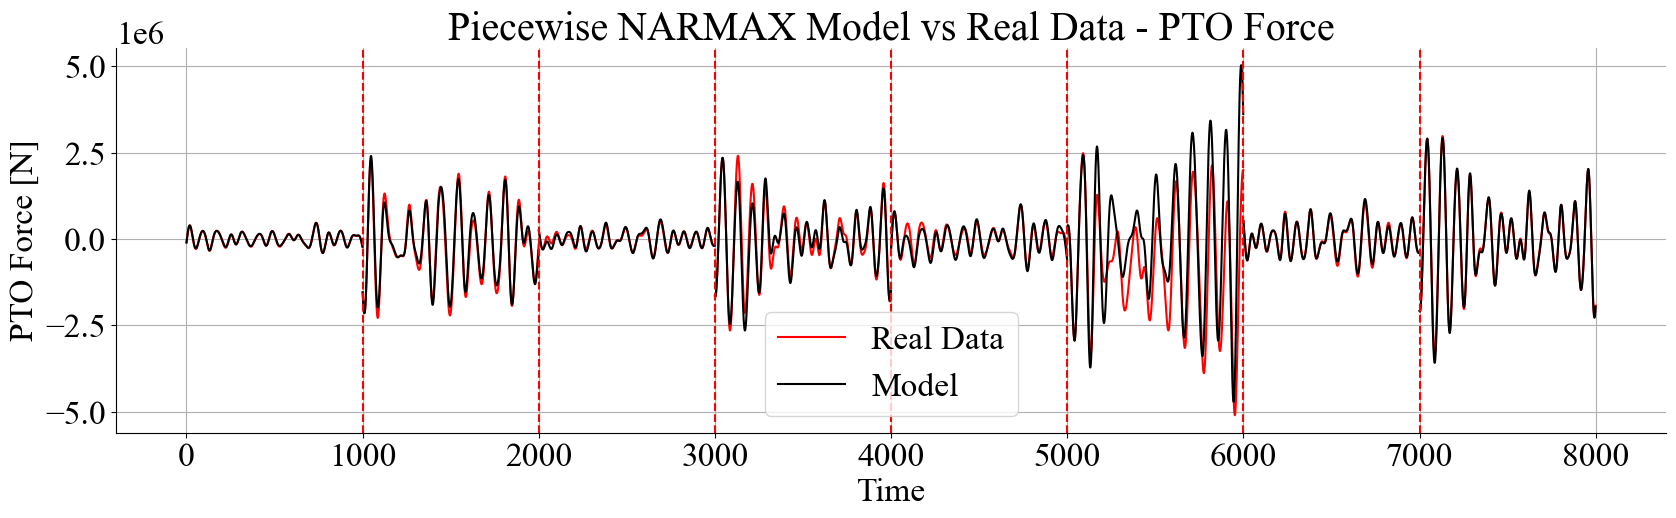

In [2]:
# Define the spring constant for the PTO system
K = 1200000

# Compute the PTO force for both real data and the NARMAX model
fpto_real = -K * real_position_results
fpto_model = -K * position_results


# Calculate the normalised RMSE of the PTO force over the entire piecewise dataset
rmse_fpto = np.sqrt(np.mean((fpto_real - fpto_model) ** 2))
norm_rmse_fpto = rmse_fpto / (np.max(fpto_real) - np.min(fpto_real))
print(f"RMSE Normalizado da Força PTO: {norm_rmse_fpto:.4f}")

# Plot comparison between real and simulated PTO forces
plt.figure(figsize=(20, 5))
for i, state_idx in enumerate(sea_state_sequence):
    start_idx = i * segment_length
    plt.plot(time[start_idx:start_idx+plot_length], fpto_real[start_idx:start_idx+plot_length], 'r', label="Real Data" if i == 0 else "")
    plt.plot(time[start_idx:start_idx+plot_length], fpto_model[start_idx:start_idx+plot_length], 'k', label="Model" if i == 0 else "")
    
# Mark transitions between different sea states
for i in range(1, len(sea_state_sequence)):
    plt.axvline(x=i * segment_length, color='r', linestyle='--')

plt.xlabel("Time")
plt.ylabel("PTO Force [N]")
plt.title("Piecewise NARMAX Model vs Real Data - PTO Force")
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.savefig("piecewise_pto_force_comparison.svg", format="svg")
